# Defining the target, case study

Goal: We want to find the next Mbappé

## 00. Coding Best Practices

In [41]:
# Basic Libraries
import pandas as pd
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Basic functions:
def data_exp(): # first exploration
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)
    return data.sample(5)

def data_clean(): # to standarize column names
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    data.sample(0)
    
# Specific functions for this dataset:
def convert_value(value): # function to convert value to unified format for our target ['Value']
    if isinstance(value, float):
        return value
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value.endswith('M'):
        return float(value[1:-1]) * 1000000
    else:
        try:
            return float(value)
        except ValueError:
            return None

## 01 - Getting the Data

In [3]:
data = pd.read_csv('fifa21_male2.csv')
data_exp()

The dataframe shape is (17125, 107) .
 
The dataframe columns are:
Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)
 
The dataframe data types are:
ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object


ID          Name  Age  OVA    Nationality         Club  BOV   BP  \
8319   227909   J. McCarthy   27   65  United States  Inter Miami   65   GK   
16408  257028     F. Kerber   17   55        Austria    WSG Tirol   57   ST   
6340   215990    O. Benítez   29   65      Argentina    Patronato   66   CB   
1769   182879  B. Dzsudzsák   33   76        Hungary      Hungary   76   RM   
11711  240499   E. Marković   21   61         Norway     IK Start   63  CAM   

      Position                                       Player Photo  \
8319        GK  https://cdn.sofifa.com/players/227/909/20_120.png   
16408       ST  https://cdn.sofifa.com/players/257/028/20_120.png   
6340     CB LB  https://cdn.sofifa.com/players/215/990/20_120.png   
1769    RM CAM  https://cdn.sofifa.com/players/182/879/20_120.png   
11711   CAM CM  https://cdn.sofifa.com/players/240/499/20_120.png   

                                              Club Logo  \
8319   https://cdn.sofifa.com/teams/112893/light_60.png   
16408   https://cdn.sofifa.com/teams/15040/light_60.png   
6340   https://cdn.sofifa.com/teams/110581/light_60.png   
1769     https://cdn.sofifa.com/teams/1886/light_60.png   
11711    https://cdn.sofifa.com/teams/1524/light_60.png   

                                Flag Photo  POT          Team & Contract  \
8319   https://cdn.sofifa.com/flags/us.png   66  Inter Miami 2019 ~ 2021   
16408  https://cdn.sofifa.com/flags/at.png   77    WSG Tirol 2020 ~ 2024   
6340   https://cdn.sofifa.com/flags/ar.png   66    Patronato 2019 ~ 2021   
1769   https://cdn.sofifa.com/flags/hu.png   76             Hungary Free   
11711  https://cdn.sofifa.com/flags/no.png   73     IK Start 2019 ~ 2023   

      Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
8319    6'3"  181lbs  Right       1   Dec 4, 2019           NaN  €450K   €2K   
16408   6'1"  159lbs  Right      22   Aug 1, 2020           NaN  €180K  €500   
6340    6'1"  174lbs   Left       1  Dec 27, 2019           NaN  €500K   €4K   
1769   5'10"  163lbs   Left       0   Aug 1, 2020           NaN     €0    €0   
11711  5'11"  168lbs  Right      12   Aug 7, 2019           NaN  €450K  €600   

      Release Clause     Contract  Attacking  Crossing  Finishing  \
8319           €709K  2019 ~ 2021         96        17         17   
16408          €441K  2020 ~ 2024        223        32         62   
6340           €763K  2019 ~ 2021        189        27         20   
1769              €0         Free        340        80         71   
11711          €653K  2019 ~ 2023        271        56         56   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
8319                 17             27     18.0     70         12   15.0   
16408                55             41     33.0    190         40   41.0   
6340                 65             45     32.0    217         22   55.0   
1769                 42             74     73.0    392         78   83.0   
11711                50             58     51.0    281         63   55.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
8319            13            16            14       203            35   
16408           28            28            53       323            65   
6340            62            35            43       250            49   
1769            82            73            76       366            74   
11711           52            49            62       366            79   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
8319             34     38.0         54     42.0    205          44     55.0   
16408            75     64.0         55     64.0    282          47     61.0   
6340             52     35.0         60     54.0    304          60     70.0   
1769             71     82.0         71     68.0    351          83     62.0   
11711            70     83.0         58     76.0    303          53     70.0   

       Stamina  Strength  Long

This dataset has 17.125 player information in  unique data in 107 columns.
* The target for our dataset will be `Value`.
* Also, since we want to know their who will be **the next Mbappé** we will need data from numerical features related to the players (we will create a new dataframe for that)
* `Value`, `Wage`, and `Release Clause` are interesting columns to work-with, but first we need to convert them to numericals.
* We will also use features such as `height`, `weight`, etc., but first they need to be converted to the metrical system and get rid of any string.

## 02 - Cleansing the Data / Data Wrangling

In [4]:
data_clean() # to standarize the column names
data = data.rename(columns={"team_&_contract": "team&contract"})

In [5]:
data.sample(0) # let's check how it looks

Empty DataFrame
Columns: [id, name, age, ova, nationality, club, bov, bp, position, player_photo, club_logo, flag_photo, pot, team&contract, height, weight, foot, growth, joined, loan_date_end, value, wage, release_clause, contract, attacking, crossing, finishing, heading_accuracy, short_passing, volleys, skill, dribbling, curve, fk_accuracy, long_passing, ball_control, movement, acceleration, sprint_speed, agility, reactions, balance, power, shot_power, jumping, stamina, strength, long_shots, mentality, aggression, interceptions, positioning, vision, penalties, composure, defending, marking, standing_tackle, sliding_tackle, goalkeeping, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes, total_stats, base_stats, w/f, sm, a/w, d/w, ir, pac, sho, pas, dri, def, phy, hits, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, ...]
Index: []

In [6]:
data_copy = data.copy() # as best practices, now we make a copy of our data

In [7]:
# Check if "id" has duplicated values to dealwith
print("There are duplicate values in 'id'.") if data_copy['id'].duplicated().any() else print("All values in 'id' are unique.")

All values in 'id' are unique.


In [8]:
data_copy = data_copy.set_index('id') # id is unique, so we passed it as the index
data_copy.sample(0)

Empty DataFrame
Columns: [name, age, ova, nationality, club, bov, bp, position, player_photo, club_logo, flag_photo, pot, team&contract, height, weight, foot, growth, joined, loan_date_end, value, wage, release_clause, contract, attacking, crossing, finishing, heading_accuracy, short_passing, volleys, skill, dribbling, curve, fk_accuracy, long_passing, ball_control, movement, acceleration, sprint_speed, agility, reactions, balance, power, shot_power, jumping, stamina, strength, long_shots, mentality, aggression, interceptions, positioning, vision, penalties, composure, defending, marking, standing_tackle, sliding_tackle, goalkeeping, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes, total_stats, base_stats, w/f, sm, a/w, d/w, ir, pac, sho, pas, dri, def, phy, hits, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

### Dealing with Null values

In [9]:
# Check for empty cells in the entire DataFrame
null_cols = data_copy.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols

club                 23
position            413
club_logo            23
joined               58
loan_date_end     16215
volleys              58
curve                58
agility              58
balance              58
jumping              58
interceptions         7
positioning           7
vision               58
composure           423
sliding_tackle       58
a/w                  89
d/w                  89
dtype: int64

In [10]:
data_copy = data_copy.drop(columns=["loan_date_end"]) # Get rid of loan_date_end since it has to many empty values

In [11]:
data_copy = data_copy.dropna(subset=['value']) # Create a new dataset without the rows with empty cells in "value" column
data_copy.shape

(17125, 105)

In [12]:
data_copy['value'].head(3) # We check the data from our target

id
2     €625K
16    €600K
27    €1.1M
Name: value, dtype: object

Our target has € an other symbols, to standarize and make it integers, we will use our specific function `convert_value`

In [13]:
data_copy['value'] = data_copy['value'].apply(convert_value) # Applying the function
data_copy['value'].head(3)

id
2      625000.0
16     600000.0
27    1100000.0
Name: value, dtype: float64

In [14]:
# We repeat that step for wage and release_clouse
data_copy['wage'] = data_copy['wage'].apply(convert_value)
data_copy['rel_clause'] = data_copy['release_clause'].apply(convert_value)
data_copy['wage'].sample(3)

id
239357     9000.0
187110    19000.0
258317     2000.0
Name: wage, dtype: float64

In [15]:
data_copy['rel_clause'].sample(3)

id
192660    2600000.0
237524    1200000.0
183593    1100000.0
Name: rel_clause, dtype: float64

In [16]:
# checking if column 'team&contract' can be dropped since info is in 'club' and 'contract'
selected_columns = data_copy.loc[:, ['club', 'team&contract', 'contract']]
selected_columns.sample(3)

club          team&contract     contract
id                                                   
235600   Al Fayha   Al Fayha 2019 ~ 2022  2019 ~ 2022
258933   SD Eibar   SD Eibar 2019 ~ 2021  2019 ~ 2021
229179  Puebla FC  Puebla FC 2018 ~ 2022  2018 ~ 2022

* We will proceed dropping those columns.
* Also, checking the [Documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) from this dataset, we will drop the columns that are categoricals referring to social media, since we will not use those for our Linear Regression.

In [17]:
data_copy = data_copy.drop(columns=["club", "player_photo", "club_logo", "flag_photo", "team&contract", "gender"])

In [18]:
data_copy.sample(3)

name  age  ova nationality  bov  bp position  pot height  \
id                                                                        
246049      A. Lupu   21   64     Romania   65  ST       ST   75   5'8"   
168607      Rafinha   34   79      Brazil   79  RB    RB LB   79   5'8"   
187132  C. Zambrano   30   73        Peru   73  CB       CB   73   6'1"   

        weight   foot  growth        joined      value     wage  \
id                                                                
246049  154lbs  Right      11   Jul 1, 2016   775000.0   4000.0   
168607  148lbs  Right       0  Aug 23, 2020  4400000.0      NaN   
187132  183lbs  Right       0   Feb 2, 2020  3200000.0  13000.0   

       release_clause                  contract  attacking  crossing  \
id                                                                     
246049          €1.8M               2016 ~ 2020        280        33   
168607          €9.2M               2020 ~ 2022        291        83   
187132          €4.5M  Boca Juniors 2020 ~ 2023        270        51   

        finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
id                                                                              
246049         68                65             61     53.0    231         60   
168607         37                43             78     50.0    356         78   
187132         41                74             68     36.0    270         66   

        curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                 
246049   30.0           34            46            61       328   
168607   77.0           58            64            79       385   
187132   36.0           33            68            67       298   

        acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                       
246049            65            64     63.0         60     76.0    301   
168607            76            73     79.0         78     79.0    286   
187132            58            54     65.0         65     56.0    328   

        shot_power  jumping  stamina  strength  long_shots  mentality  \
id                                                                      
246049          63     63.0       60        57          58        217   
168607          58     53.0       78        53          44        364   
187132          63     77.0       61        73          54        292   

        aggression  interceptions  positioning  vision  penalties  composure  \
id                                                                             
246049          40           19.0         62.0    41.0         55       58.0   
168607          84           76.0         73.0    68.0         63       78.0   
187132          90           69.0         44.0    45.0         44       73.0   

        defending  marking  standing_tackle  sliding_tackle  goalkeeping  \
id                                                                         
246049         40       11               12            17.0           37   
168607        235       75               78            82.0           65   
187132        225       74               75            76.0           65   

        gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  \
id                                                                        
246049          6            7          12               6            6   
168607         15            7          16              12           15   
187132         14           12          13              12           14   

        total_stats  base_stats  w/f  sm     a/w     d/w   ir  pac  sho  pas  \
id                                                                             
246049         1434         308  2 ★  3★    High  Medium  1 ★   64   63   46   
168607         1982         411  3 ★  3★  Medium  Medium  2 

In [19]:
data_copy.shape

(17125, 100)

* After a first data-cleansing we moved from 107 features to 100.
* We can still reduce that number, since we don't want to use categoricals.
* Some columns considered as **categoricals** are actually **numericals**, e.g: `height`, `weight`, etc.
* We will proceed to encode them:

### Encoding

In [20]:
# Convert height data from feet and inches to centimeters
data_copy['h_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)
data_copy['h_cm'].sample(3)

id
258883    187.96
198176    187.96
248743    167.64
Name: h_cm, dtype: float64

In [21]:
# Convert weight data from pounds to kilograms
data_copy['w_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)
data_copy['w_kg'].sample(3)

id
189468    78.018688
192568    87.997823
209675    74.843509
Name: w_kg, dtype: float64

# ! 
### TO-DO: Adding information regarding w/f, s/m and ir columns, to explain the following changes:

In [22]:
# Apply lambda function to 'w/f' column
data_copy['w/f_ecd'] = data_copy['w/f'].apply(lambda x: int(x[0]))
data_copy['w/f_ecd'].sample(3)

id
177182    3
231443    5
229212    4
Name: w/f_ecd, dtype: int64

In [23]:
# Apply lambda function to 's/f' column
data_copy['sm_ecd'] = data_copy['sm'].apply(lambda x: int(x[0]))
data_copy['sm_ecd'].sample(3)

id
204612    3
201082    1
246136    2
Name: sm_ecd, dtype: int64

In [24]:
# Apply lambda function to 'w/f' column
data_copy['ir_ecd'] = data_copy['ir'].apply(lambda x: int(x[0]))
data_copy['ir_ecd'].sample(3)

id
246298    1
252891    1
253213    1
Name: ir_ecd, dtype: int64

# ! 
### TO-DO: Defining a function for the lambda above, to make it easier to run (if there is some time left...)
#### e.g> def lambda_game():

### Further Encoding

In [25]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['a/w_ecd'] = le.fit_transform(data_copy['a/w'])
data_copy['d/w_ecd'] = le.fit_transform(data_copy['d/w'])

In [26]:
# Modify cells with 'K' character, leave others unchanged, turn it to integer
data_copy['hits'] = data_copy['hits'].apply(lambda x: float(x.replace('K','')) * 1000 if isinstance(x, str) and 'K' in x else x).astype(int)

In [27]:
# Create a new dataframe with only the numerical columns using select_dtypes
X_N = data_copy.select_dtypes(np.number).apply(lambda x: round(x,2)).fillna(0) # we also deal with NaN values
X_N.head()

age  ova  bov  pot  growth      value     wage  attacking  crossing  \
id                                                                        
2    33   69   71   69       0   625000.0   7000.0        313        75   
16   37   71   70   71       0   600000.0   7000.0        337        68   
27   33   71   71   71       0  1100000.0  15000.0        337        80   
36   36   68   70   82      14        0.0      0.0        264        54   
41   36   81   82   81       0  5500000.0  12000.0        367        75   

    finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
id                                                                          
2          50                59             71     58.0    338         73   
16         64                61             76     68.0    369         69   
27         64                41             77     75.0    387         79   
36         70                60             80      0.0    255         68   
41         69                54             90     79.0    408         85   

    curve  fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                           
2    65.0           60            69            71       347            68   
16   79.0           79            71            71       305            56   
27   84.0           77            69            78       295            48   
36    0.0           46            64            77       176            59   
41   80.0           70            83            90       346            61   

    sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
id                                                                          
2             74     68.0         69     68.0    347          74     68.0   
16            50     62.0         65     72.0    324          75     54.0   
27            42     71.0         59     75.0    284          72     58.0   
36            62      0.0         55      0.0    239          63      0.0   
41            56     79.0         75     75.0    297          67     40.0   

    stamina  strength  long_shots  mentality  aggression  interceptions  \
id                                                                        
2        69        68          68        320          72           69.0   
16       64        60          71        362          71           71.0   
27       29        56          69        317          69           39.0   
36       51        66          59        271          59           70.0   
41       58        62          70        370          58           70.0   

    positioning  vision  penalties  composure  defending  marking  \
id                                                                  
2          63.0    66.0         50        0.0        208       70   
16         72.0    73.0         75       79.0        153       70   
27         69.0    74.0         66        0.0         99       35   
36         72.0     0.0         70        0.0         75       34   
41         78.0    93.0         71       89.0        181       68   

    standing_tackle  sliding_tackle  goalkeeping  gk_diving  gk_handling  \
id                                                                         
2                69            69.0           56         14            5   
16               43            40.0           56          9           12   
27               34            30.0           51          9            6   
36               41             0.0           68          5           21   
41               57            56.0           45          6           13   

    gk_kicking  gk_positioning  gk_reflexes  total_stats  base_stats  pac  \
id                                                                          
2           15              10           12         1929         408   71   
16          13              11           11         1906         385   53   


In [28]:
data_headers = list(X_N.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers) 

The Column Headers are : ['age', 'ova', 'bov', 'pot', 'growth', 'value', 'wage', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'rel_clause', 'h_cm', 'w_kg', 'w/f_ecd', 'sm_ecd', 'ir_ecd', 'a/w_ecd', 'd/w_ecd']


In [29]:
# We simply move our target Value to the right, for readibility
X_N = X_N[['age', 'ova', 'bov', 'pot', 'growth', 'wage', 'attacking', 'crossing', 'finishing', 'heading_accuracy',
           'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
           'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina',
           'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
           'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
           'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy',
           'hits', 'rel_clause', 'h_cm', 'w_kg', 'w/f_ecd', 'sm_ecd', 'ir_ecd', 'a/w_ecd', 'd/w_ecd', 'value']]
X_N.shape

(17125, 65)

* To make it simple to work with our model, we will get rid of the following columns:
    * ['attacking', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement','acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties','composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'] 
* Since it is already summerized in `total_stats`

In [30]:
X_N = X_N[['age', 'ova', 'bov', 'pot', 'wage', 'goalkeeping', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 
                  'dri', 'def', 'phy', 'hits', 'h_cm', 'w_kg', 'w/f_ecd', 'sm_ecd', 'ir_ecd', 'a/w_ecd', 'd/w_ecd', 'value']]
X_N.shape

(17125, 23)

* We got a cleaned dataset with `17.125` numerical player information in `23` distinct columns.

In [31]:
X_N.sample(3)

age  ova  bov  pot    wage  goalkeeping  total_stats  base_stats  pac  \
id                                                                              
237665   25   68   70   72  2000.0           45         1632         353   76   
234989   27   71   71   71  2000.0           59         1834         395   82   
227185   28   64   64   64  2000.0           63         1644         356   73   

        sho  pas  dri  def  phy  hits    h_cm   w_kg  w/f_ecd  sm_ecd  ir_ecd  \
id                                                                              
237665   65   53   69   24   66     3  177.80  73.03        3       3       1   
234989   50   62   68   68   65     4  170.18  63.96        3       3       1   
227185   61   59   62   43   58     4  170.18  66.23        3       2       1   

        a/w_ecd  d/w_ecd      value  
id                                   
237665        2        1  1200000.0  
234989        0        2  2100000.0  
227185        0        2   450000.0

## 03 - Exploratory Data Analysis

In [32]:
X_N.describe() # basic statistics for all numerical values

age           ova           bov           pot           wage  \
count  17125.000000  17125.000000  17125.000000  17125.000000   17125.000000   
mean      25.272934     66.965022     67.900204     72.489810   10436.963504   
std        4.942665      6.864329      6.637538      5.769949   21191.481943   
min       16.000000     38.000000     42.000000     47.000000       0.000000   
25%       21.000000     62.000000     64.000000     69.000000    1000.000000   
50%       25.000000     67.000000     68.000000     72.000000    3000.000000   
75%       29.000000     72.000000     72.000000     76.000000   11000.000000   
max       53.000000     93.000000     93.000000     95.000000  560000.000000   

        goalkeeping   total_stats    base_stats           pac           sho  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      77.609693   1631.256175    361.372146     68.091620     54.967299   
std       81.136603    260.357024     40.252290     11.147116     13.877605   
min        5.000000    731.000000    228.000000     25.000000     16.000000   
25%       48.000000   1492.000000    333.000000     62.000000     46.000000   
50%       53.000000   1659.000000    362.000000     69.000000     58.000000   
75%       59.000000   1812.000000    390.000000     75.000000     65.000000   
max      440.000000   2316.000000    498.000000     96.000000     93.000000   

                pas           dri           def           phy          hits  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      58.926540     64.209869     50.266102     64.910715     36.369285   
std       10.186728      9.832734     16.853801      9.660260    166.898102   
min       25.000000     28.000000     12.000000     27.000000      3.000000   
25%       52.000000     59.000000     35.000000     59.000000      4.000000   
50%       60.000000     65.000000     53.000000     66.000000      7.000000   
75%       66.000000     71.000000     64.000000     72.000000     18.000000   
max       93.000000     95.000000     91.000000     93.000000   9200.000000   

               h_cm          w_kg       w/f_ecd        sm_ecd        ir_ecd  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean     181.222956     75.141428      2.985927      2.452496      1.152234   
std        6.886553      7.175338      0.672551      0.781285      0.461311   
min      154.940000     49.900000      1.000000      1.000000      1.000000   
25%      175.260000     69.850000      3.000000      2.000000      1.000000   
50%      180.340000     74.840000      3.000000      2.000000      1.000000   
75%      185.420000     79.830000      3.000000      3.000000      1.000000   
max      205.740000    110.220000      5.000000      5.000000      5.000000   

            a/w_ecd       d/w_ecd         value  
count  17125.000000  17125.000000  1.712500e+04  
mean       1.354978      1.548088  2.567377e+06  
std        0.916545      0.781324  5.372622e+06  
min        0.000000      0.000000  0.000000e+00  
25%        0.000000      1.000000  3.750000e+05  
50%        2.000000      2.000000  8.000000e+05  
75%        2.000000      2.000000  2.400000e+06  
max        3.000000      3.000000  1.055000e+08

In [33]:
# Looking at promising talents
data_copy['pot_minus_ova'] = data_copy['pot'] - data_copy['ova'] 

# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data_copy[(data_copy['pot_minus_ova'] > 10) & (data_copy['age'] < 21)]
talents.head(3)

name  age  ova  nationality  bov  bp position  pot height  \
id                                                                           
177561   B. Rodriguez   20   50      Uruguay   50  ST       ST   66   6'2"   
183303    Vasconcelos   19   57       Brazil   57  CM       CM   71   6'0"   
184384  D. Stadelmann   20   42  Switzerland   48  RM       RM   62  5'11"   

        weight   foot  growth joined  value  wage release_clause contract  \
id                                                                          
177561  176lbs  Right      16    NaN    NaN   NaN             €0     2007   
183303  179lbs  Right      14    NaN    NaN   NaN             €0     2007   
184384  161lbs  Right      20    NaN    NaN   NaN             €0     2007   

        attacking  crossing  finishing  heading_accuracy  short_passing  \
id                                                                        
177561        184        34         58                62             30   
183303        203        51         48                42             62   
184384        144        28         28                31             57   

        volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
id                                                                    
177561      NaN    162         53    NaN           34            31   
183303      NaN    207         42    NaN           45            65   
184384      NaN    182         52    NaN           29            47   

        ball_control  movement  acceleration  sprint_speed  agility  \
id                                                                    
177561            44       123            41            48      NaN   
183303            55       189            71            66      NaN   
184384            54       136            53            41      NaN   

        reactions  balance  power  shot_power  jumping  stamina  strength  \
id                                                                          
177561         34      NaN    193          45      NaN       45        49   
183303         52      NaN    214          41      NaN       64        62   
184384         42      NaN    142          34      NaN       42        39   

        long_shots  mentality  aggression  interceptions  positioning  vision  \
id                                                                              
177561          54         76          42            NaN          NaN     NaN   
183303          47        200          48           42.0         51.0     NaN   
184384          27         81          21           24.0         15.0     NaN   

        penalties  composure  defending  marking  standing_tackle  \
id                                                                  
177561         34        NaN         32       17               15   
183303         59        NaN         82       41               41   
184384         21        NaN         45       21               24   

        sliding_tackle  goalkeeping  gk_diving  gk_handling  gk_kicking  \
id                                                                        
177561             NaN           22          5            4          31   
183303             NaN           74         11           21          65   
184384             NaN           69          6           21          47   

        gk_positioning  gk_reflexes  total_stats  base_stats  w/f  sm  a/w  \
id                                                                           
177561               4            9          792         244  2 ★  1★  NaN   
183303              21           21         1169         322  3 ★  1★  NaN   
184384              21           21          799         229  3 ★  1★  NaN   

        d/w   ir  pac  sho  pas  dri  def  phy  hits    ls    st    rs    lw  \
id                                                                             
177561  NaN  1 ★   45   53   32   47   21   46     3  50+0  50+0  50+0  42+0   
183303 

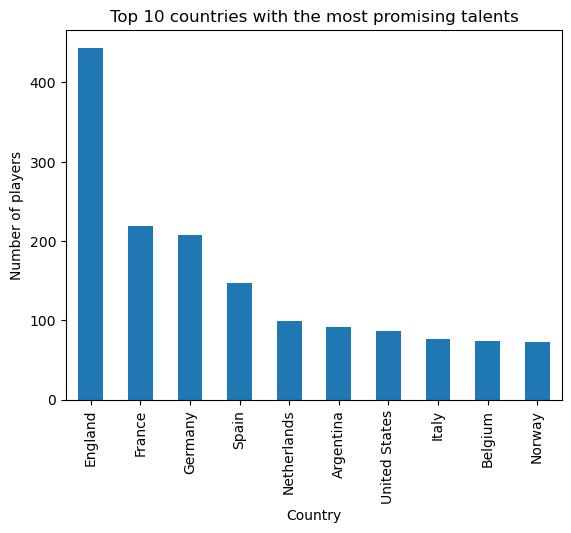

In [34]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()

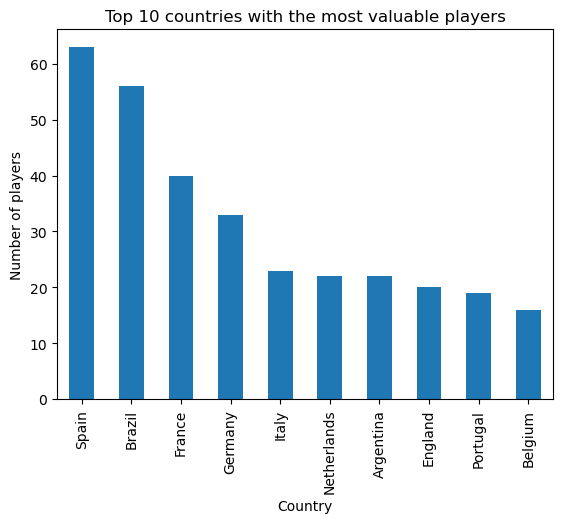

In [35]:
# Looking at MVPs with rating >80
mvps = data_copy[(data_copy['ova'] > 80)]

# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()

## 04 - Processing Data

### Check correlations

In [36]:
# Correlation Matrix
X_N_corr = round(X_N.corr(),2)
X_N_corr

age   ova   bov   pot  wage  goalkeeping  total_stats  \
age          1.00  0.52  0.46 -0.24  0.20         0.13         0.28   
ova          0.52  1.00  0.99  0.59  0.60         0.04         0.61   
bov          0.46  0.99  1.00  0.63  0.60        -0.01         0.64   
pot         -0.24  0.59  0.63  1.00  0.46        -0.01         0.33   
wage         0.20  0.60  0.60  0.46  1.00        -0.01         0.38   
goalkeeping  0.13  0.04 -0.01 -0.01 -0.01         1.00        -0.63   
total_stats  0.28  0.61  0.64  0.33  0.38        -0.63         1.00   
base_stats   0.41  0.83  0.83  0.47  0.48         0.10         0.68   
pac         -0.18  0.20  0.21  0.26  0.12        -0.00         0.26   
sho          0.31  0.49  0.48  0.24  0.30         0.25         0.32   
pas          0.40  0.70  0.69  0.40  0.42         0.17         0.56   
dri          0.24  0.64  0.64  0.45  0.39         0.16         0.49   
def          0.22  0.34  0.35  0.17  0.19        -0.20         0.39   
phy          0.44  0.54  0.54  0.16  0.26         0.06         0.30   
hits        -0.08  0.24  0.25  0.35  0.30        -0.03         0.16   
h_cm         0.09  0.03  0.02 -0.02  0.02         0.35        -0.37   
w_kg         0.26  0.15  0.13 -0.04  0.07         0.33        -0.25   
w/f_ecd      0.08  0.20  0.21  0.14  0.14        -0.20         0.32   
sm_ecd       0.07  0.35  0.37  0.24  0.25        -0.58         0.72   
ir_ecd       0.40  0.47  0.46  0.29  0.54         0.02         0.27   
a/w_ecd     -0.03 -0.17 -0.17 -0.11 -0.11         0.22        -0.33   
d/w_ecd     -0.13 -0.16 -0.16 -0.04 -0.11         0.18        -0.23   
value        0.10  0.63  0.64  0.56  0.82         0.00         0.39   

             base_stats   pac   sho   pas   dri   def   phy  hits  h_cm  w_kg  \
age                0.41 -0.18  0.31  0.40  0.24  0.22  0.44 -0.08  0.09  0.26   
ova                0.83  0.20  0.49  0.70  0.64  0.34  0.54  0.24  0.03  0.15   
bov                0.83  0.21  0.48  0.69  0.64  0.35  0.54  0.25  0.02  0.13   
pot                0.47  0.26  0.24  0.40  0.45  0.17  0.16  0.35 -0.02 -0.04   
wage               0.48  0.12  0.30  0.42  0.39  0.19  0.26  0.30  0.02  0.07   
goalkeeping        0.10 -0.00  0.25  0.17  0.16 -0.20  0.06 -0.03  0.35  0.33   
total_stats        0.68  0.26  0.32  0.56  0.49  0.39  0.30  0.16 -0.37 -0.25   
base_stats         1.00  0.44  0.62  0.85  0.80  0.33  0.49  0.20 -0.12  0.01   
pac                0.44  1.00  0.31  0.25  0.52 -0.25 -0.13  0.13 -0.38 -0.34   
sho                0.62  0.31  1.00  0.66  0.77 -0.42  0.05  0.12 -0.09  0.01   
pas                0.85  0.25  0.66  1.00  0.82  0.14  0.17  0.16 -0.21 -0.10   
dri                0.80  0.52  0.77  0.82  1.00 -0.15  0.02  0.19 -0.31 -0.21   
def                0.33 -0.25 -0.42  0.14 -0.15  1.00  0.51  0.04  0.09  0.10   
phy                0.49 -0.13  0.05  0.17  0.02  0.51  1.00  0.07  0.44  0.54   
hits               0.20  0.13  0.12  0.16  0.19  0.04  0.07  1.00 -0.01 -0.02   
h_cm              -0.12 -0.38 -0.09 -0.21 -0.31  0.09  0.44 -0.01  1.00  0.77   
w_kg               0.01 -0.34  0.01 -0.10 -0.21  0.10  0.54 -0.02  0.77  1.00   
w/f_ecd            0.21  0.13  0.25  0.23  0.26 -0.07 -0.01  0.07 -0.16 -0.12   
sm_ecd             0.37  0.32  0.33  0.37  0.46 -0.05 -0.09  0.16 -0.42 -0.35   
ir_ecd             0.35 -0.06  0.28  0.36  0.29  0.15  0.19  0.13  0.05  0.12   
a/w_ecd           -0.22 -0.28 -0.19 -0.14 -0.22  0.04 -0.03 -0.09  0.21  0.16   
d/w_ecd           -0.11  0.08  0.04 -0.03  0.02 -0.21 -0.23 -0.04  0.01 -0.03   
value              0.53  0.21  0.32  0.44  0.44  0.17  0.27  0.40 -0.00  0.04   

             w/f_ecd  sm_ecd  ir_ecd  a/w_ecd  d/w_ecd  value  
age             0.08    0.07    0.40    -0.03    -0.13   0.10  
ova             0.20    0.35    0.47    -0.17    -0.16   0.63  
bov             0.21    0.37    0.46    -0.17    -0.16   0.64  
pot             0.14    0.24    0.29    -0.11    -0.04   0.56  
wage            0.14    0.25    0.54    -0.1

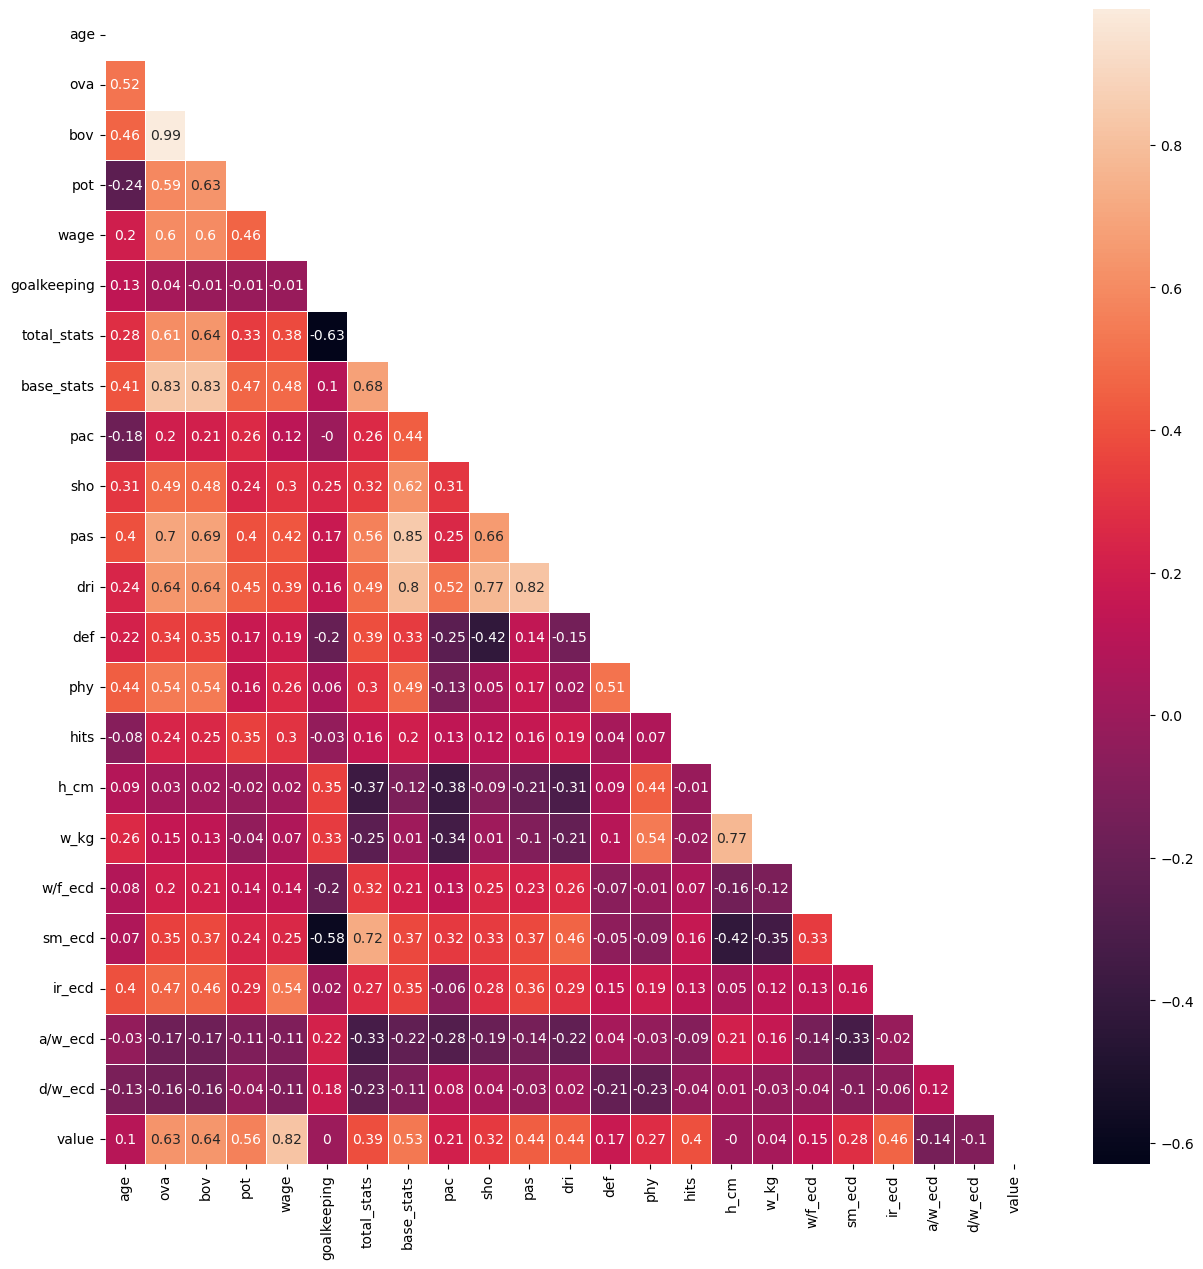

In [37]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_N_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(X_N_corr, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

In [38]:
# After checking the features and target value and the correlation within the values we decide to remove: bov
X_N = X_N.drop(columns=["bov"])
X_N.sample(2)

age  ova  pot    wage  goalkeeping  total_stats  base_stats  pac  sho  \
id                                                                              
236796   20   58   71     0.0           54         1362         294   64   30   
169464   28   69   69  7000.0           43         1832         397   83   49   

        pas  dri  def  phy  hits    h_cm   w_kg  w/f_ecd  sm_ecd  ir_ecd  \
id                                                                         
236796   41   39   58   62     3  193.04  83.01        3       2       1   
169464   61   69   63   72     7  185.42  82.10        2       3       1   

        a/w_ecd  d/w_ecd     value  
id                                  
236796        2        2  220000.0  
169464        2        2  825000.0

In [39]:
# We will also drop 'pas', it shares multicollinearity with 'dri' and it's to closer to 1.
X_N = X_N.drop(columns=["pas"])
X_N.sample(2)

age  ova  pot    wage  goalkeeping  total_stats  base_stats  pac  sho  \
id                                                                              
203266   26   62   63  2000.0           61         1540         339   78   58   
245338   19   59   73  1000.0           60         1537         315   55   44   

        dri  def  phy  hits    h_cm   w_kg  w/f_ecd  sm_ecd  ir_ecd  a/w_ecd  \
id                                                                             
203266   63   22   63     3  185.42  73.03        4       2       1        2   
245338   60   56   40     8  175.26  67.13        3       3       1        2   

        d/w_ecd     value  
id                         
203266        2  350000.0  
245338        2  325000.0

### Normalizing the Data

In [43]:
transformer = MinMaxScaler().fit(X_N) # rescale the Data into 0,1 for our model
X_N_minmax = transformer.transform(X_N) 

In [47]:
# create new data frame using data from 'X_N_minmax'
X_N_normalized = pd.DataFrame(X_N_minmax, columns = X_N.columns)
X_N_normalized.sample(5) 

age       ova       pot      wage  goalkeeping  total_stats  \
2238   0.324324  0.818182  0.750000  0.044643     0.128736     0.889590   
9896   0.162162  0.618182  0.708333  0.010714     0.103448     0.745741   
2825   0.459459  0.709091  0.625000  0.071429     0.112644     0.620189   
10179  0.216216  0.545455  0.520833  0.017857     0.128736     0.598107   
13910  0.081081  0.454545  0.604167  0.003571     0.098851     0.588013   

       base_stats       pac       sho       dri       def       phy      hits  \
2238     0.807407  0.746479  0.818182  0.820896  0.582278  0.575758  0.015005   
9896     0.644444  0.676056  0.688312  0.716418  0.506329  0.500000  0.003262   
2825     0.518519  0.309859  0.519481  0.343284  0.822785  0.787879  0.000000   
10179    0.522222  0.859155  0.649351  0.567164  0.227848  0.484848  0.000326   
13910    0.470370  0.661972  0.597403  0.597015  0.265823  0.530303  0.000652   

       h_cm      w_kg  w/f_ecd  sm_ecd  ir_ecd   a/w_ecd   d/w_ecd     value  
2238   0.45  0.270723      0.5    0.75    0.50  0.000000  0.000000  0.246445  
9896   0.40  0.285643      0.5    0.75    0.00  0.666667  0.666667  0.045498  
2825   0.70  0.548906      0.5    0.25    0.25  0.333333  0.666667  0.025592  
10179  0.55  0.413462      0.5    0.50    0.00  0.666667  0.666667  0.011374  
13910  0.60  0.413462      0.5    0.50    0.00  0.666667  0.666667  0.006635

Красивый!
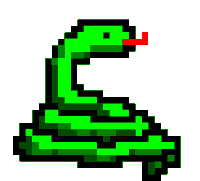

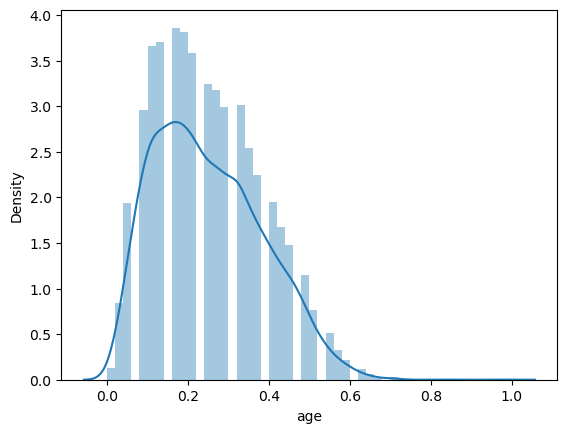

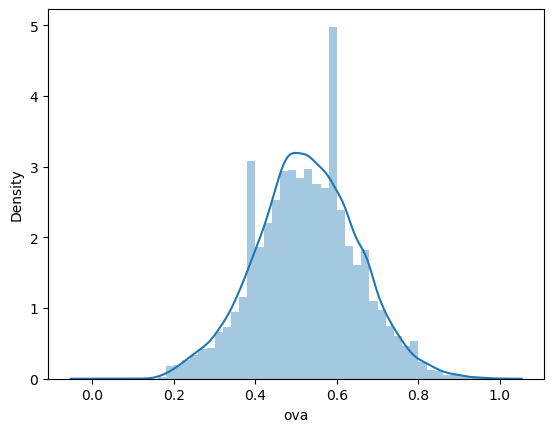

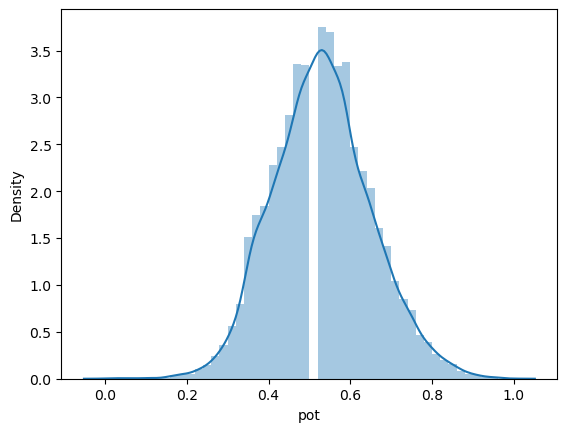

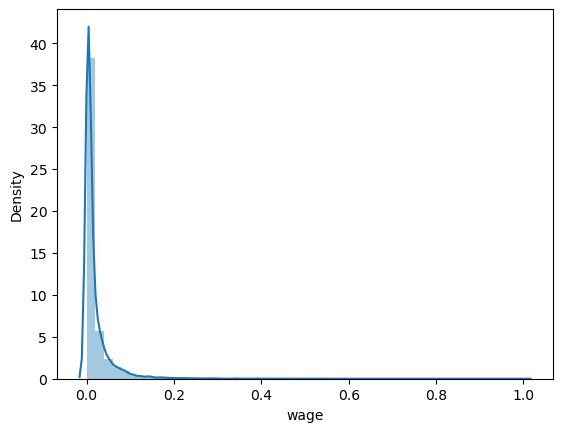

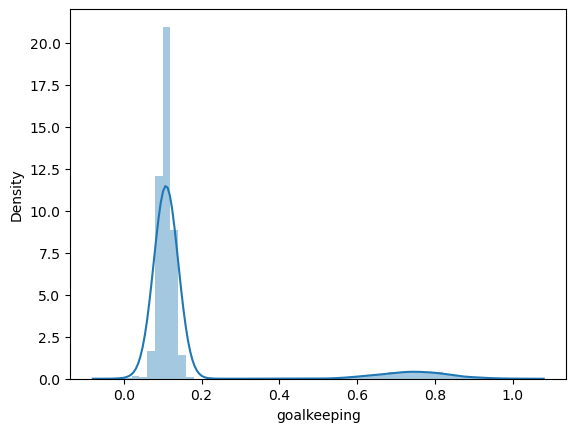

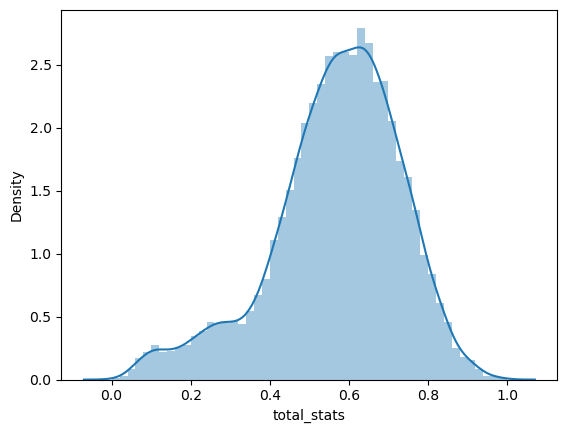

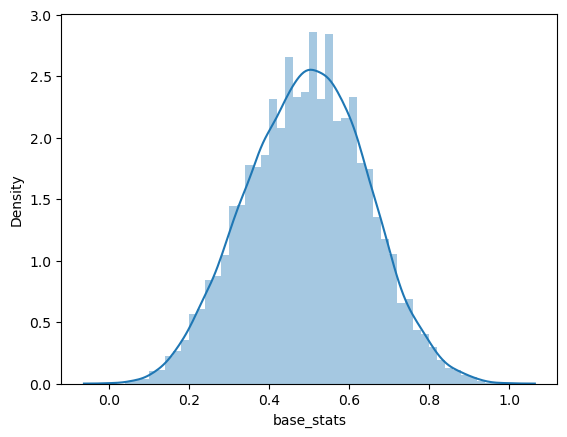

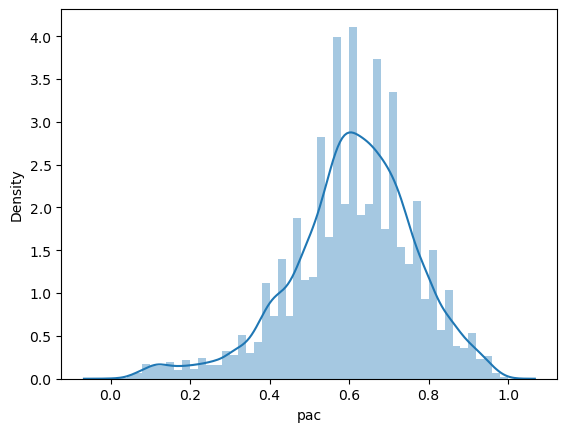

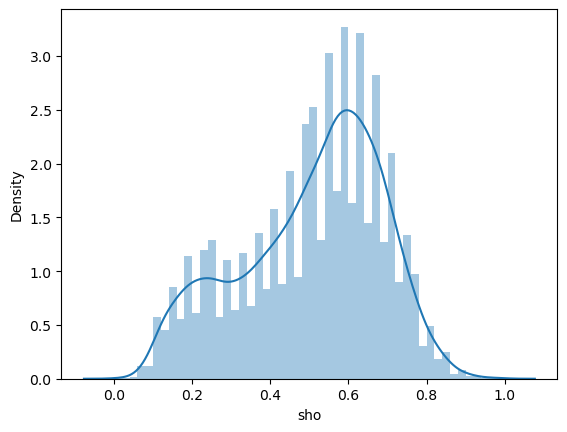

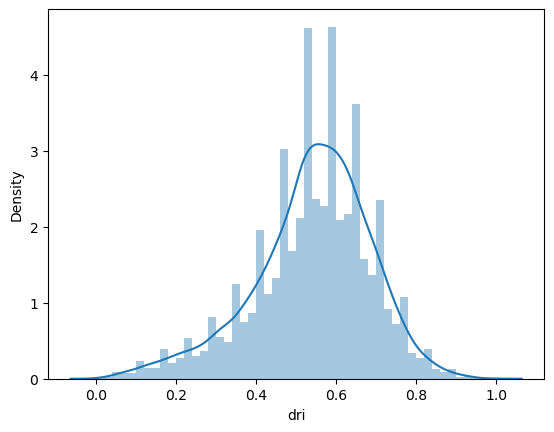

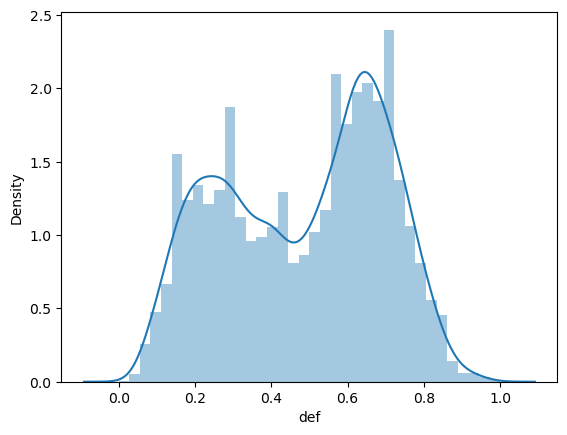

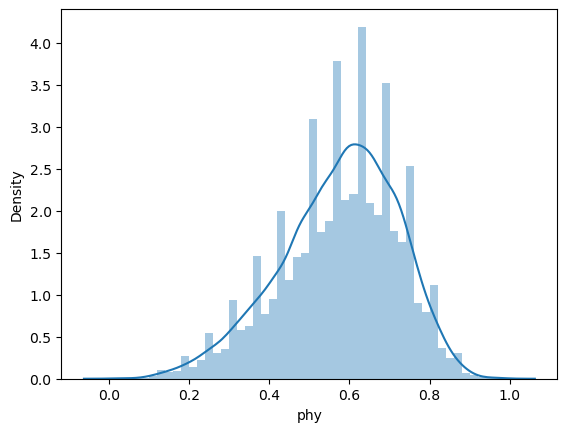

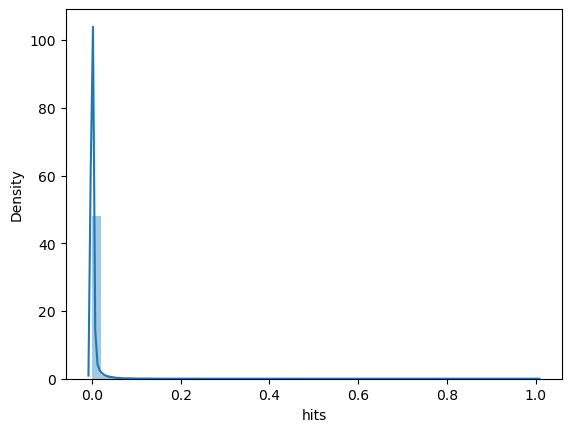

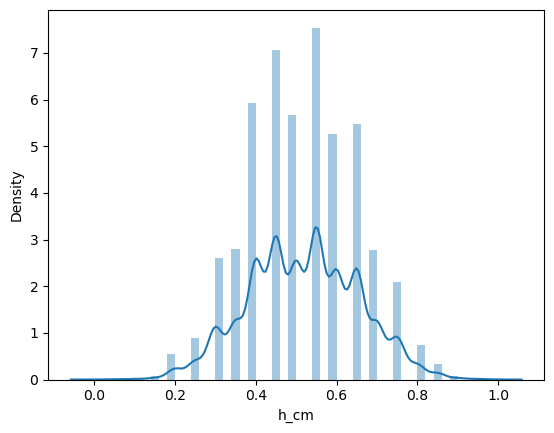

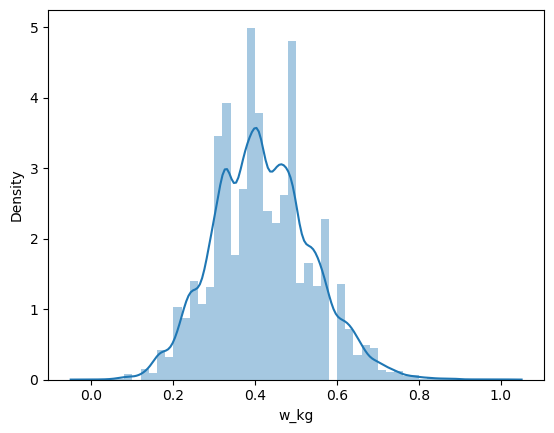

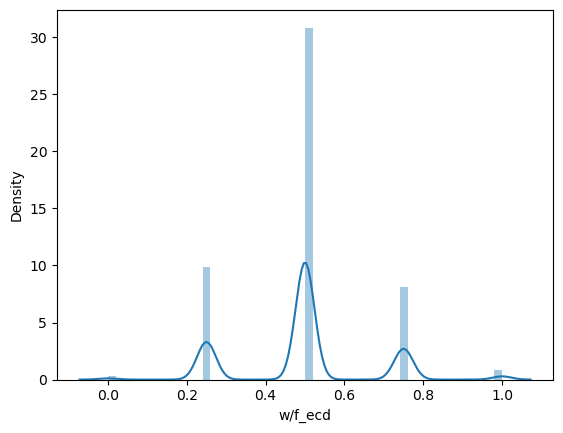

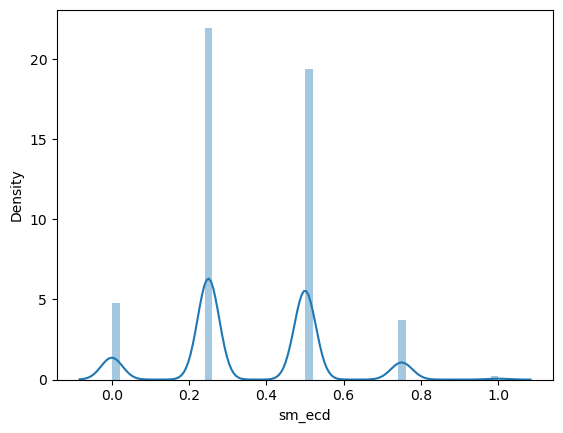

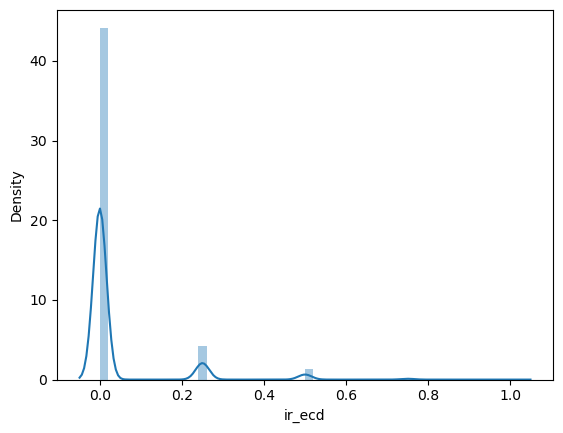

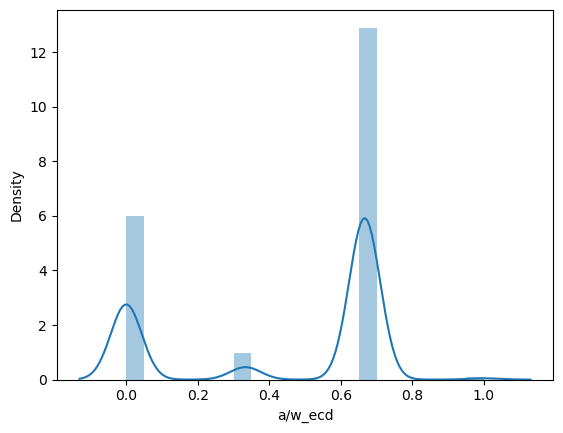

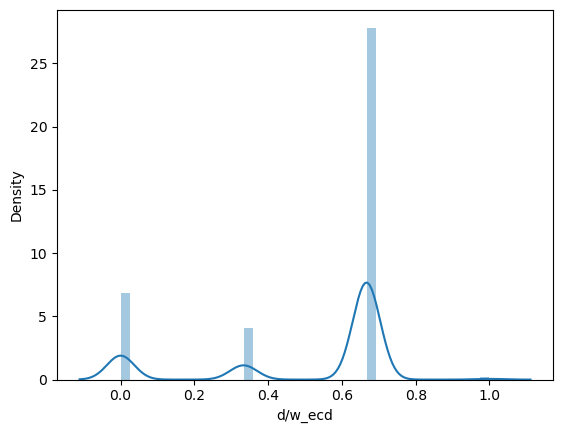

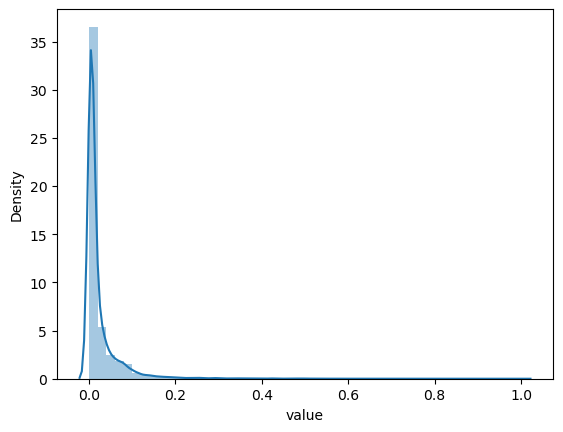

In [54]:
for i in X_N_normalized:
    sns.distplot(X_N_normalized[i])
    plt.show()

# ! 
### TO-DO: Making better plots and heatmaps... Also, what do we do with 'Hits'?


## 05 - Modeling

### X-Y Split

In [58]:
Y = X_N_normalized['value']
X = X_N_normalized.drop(['value'], axis=1) 
X.sample(5)

age       ova       pot      wage  goalkeeping  total_stats  \
8094   0.378378  0.672727  0.583333  0.032143     0.158621     0.676972   
15435  0.108108  0.454545  0.687500  0.000000     0.103448     0.632177   
7280   0.270270  0.490909  0.395833  0.005357     0.135632     0.647319   
10557  0.189189  0.636364  0.708333  0.041071     0.103448     0.717981   
12750  0.216216  0.654545  0.666667  0.053571     0.101149     0.660568   

       base_stats       pac       sho       dri       def       phy      hits  \
8094     0.559259  0.577465  0.753247  0.641791  0.227848  0.833333  0.001957   
15435    0.525926  0.563380  0.532468  0.462687  0.632911  0.606061  0.001087   
7280     0.581481  0.788732  0.571429  0.552239  0.658228  0.439394  0.000435   
10557    0.629630  0.563380  0.519481  0.611940  0.746835  0.666667  0.005871   
12750    0.596296  0.802817  0.714286  0.701493  0.227848  0.500000  0.012287   

       h_cm      w_kg  w/f_ecd  sm_ecd  ir_ecd   a/w_ecd   d/w_ecd  
8094   0.45  0.714357     0.50    0.50     0.0  0.000000  0.333333  
15435  0.40  0.315816     0.25    0.25     0.0  0.666667  0.000000  
7280   0.40  0.202918     0.50    0.50     0.0  0.000000  0.666667  
10557  0.45  0.413462     0.50    0.50     0.0  0.666667  0.000000  
12750  0.60  0.436008     0.75    0.50     0.0  0.000000  0.333333

### Train-Test Split

In [59]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [60]:
len(X)*0.7 # Len before the test

11987.5

In [61]:
len(X_test) # Len after the test

5138

In [62]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

## 06 - Model Validation

In [63]:
predictions = model.predict(X_test)

In [64]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7494732336268766, 0.0263614037144129, 0.0006949236057942623)

In [65]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.7494732336268766
RMSE =  0.0263614037144129
The value of the metric MSE is  0.0006949236057942623
MAE =  0.013491288332222103
